# <b> Result Prediction </b>
### Importing Libarires

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [184]:
df = pd.read_csv('data.csv')
df.head()

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,NaN,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,Male,NaN,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,Female,NaN,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,Male,NaN,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,Male,NaN,17024.0,16


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1st           176 non-null    float64
 1   2nd           174 non-null    float64
 2   3rd           176 non-null    float64
 3   4th           173 non-null    float64
 4   5th           172 non-null    float64
 5   College Code  178 non-null    int64  
 6   Gender        177 non-null    object 
 7   Roll          132 non-null    float64
 8   Roll no.      46 non-null     float64
 9   Subject Code  178 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 14.0+ KB


In [186]:
df.isnull().sum()

1st               2
2nd               4
3rd               2
4th               5
5th               6
College Code      0
Gender            1
Roll             46
Roll no.        132
Subject Code      0
dtype: int64

#### <b>Filling the Null values and Merging Roll and Roll no columns into One Roll_No column.</b>

In [187]:
df['Roll'].fillna(0,inplace=True)
df['Roll no.'].fillna(0,inplace = True)

In [188]:
df['Roll_No'] = df['Roll'] + df['Roll no.']
df.drop(['Roll','Roll no.'],axis=1,inplace=True)

In [189]:
df.head()

,1st,2nd,3rd,4th,5th,College Code,Gender,Subject Code,Roll_No
0,8.11,7.68,7.11,7.43,8.18,115,Female,16,17020.0
1,6.48,5.90,4.15,4.29,4.96,115,Male,16,17021.0
2,8.41,8.24,7.52,8.25,7.75,115,Female,16,17022.0
3,7.33,6.83,6.33,6.79,6.89,115,Male,16,17023.0
4,7.89,7.34,7.22,7.32,7.46,115,Male,16,17024.0


### Filling the Remaining Null values in the Dataset

In [190]:
df['Gender'].fillna(0,inplace=True)

In [191]:
df['1st'].mean()

7.03886363636364

In [192]:
df['1st'].fillna(df['1st'].mean(),inplace = True)   
df['2nd'].fillna(df['2nd'].mean(),inplace=True)          
df['3rd'].fillna(df['3rd'].mean(),inplace=True)         
df['4th'].fillna(df['4th'].mean(),inplace=True)          
df['5th'].fillna(df['5th'].mean(),inplace=True)           

In [193]:
df.isnull().sum()

1st             0
2nd             0
3rd             0
4th             0
5th             0
College Code    0
Gender          0
Subject Code    0
Roll_No         0
dtype: int64

In [194]:
df['College Code']=df['College Code'].astype(str)
df['Subject Code']=df['Subject Code'].astype(str)
df['Roll_No']=df['Roll_No'].astype(str)
df['Student_Id']=df['College Code']+df['Subject Code']+df['Roll_No']
df['Student_Id']

0      1151617020.0
1      1151617021.0
2      1151617022.0
3      1151617023.0
4      1151617024.0
           ...     
173    2412817048.0
174    2412817049.0
175    2412817050.0
176    2412817051.0
177    2412817052.0
Name: Student_Id, Length: 178, dtype: object

In [195]:
df.head()

,1st,2nd,3rd,4th,5th,College Code,Gender,Subject Code,Roll_No,Student_Id
0,8.11,7.68,7.11,7.43,8.18,115,Female,16,17020.0,1151617020.0
1,6.48,5.90,4.15,4.29,4.96,115,Male,16,17021.0,1151617021.0
2,8.41,8.24,7.52,8.25,7.75,115,Female,16,17022.0,1151617022.0
3,7.33,6.83,6.33,6.79,6.89,115,Male,16,17023.0,1151617023.0
4,7.89,7.34,7.22,7.32,7.46,115,Male,16,17024.0,1151617024.0


In [196]:
df.drop(columns=['Subject Code','Roll_No'],inplace=True)
df.head()

,1st,2nd,3rd,4th,5th,College Code,Gender,Student_Id
0,8.11,7.68,7.11,7.43,8.18,115,Female,1151617020.0
1,6.48,5.90,4.15,4.29,4.96,115,Male,1151617021.0
2,8.41,8.24,7.52,8.25,7.75,115,Female,1151617022.0
3,7.33,6.83,6.33,6.79,6.89,115,Male,1151617023.0
4,7.89,7.34,7.22,7.32,7.46,115,Male,1151617024.0


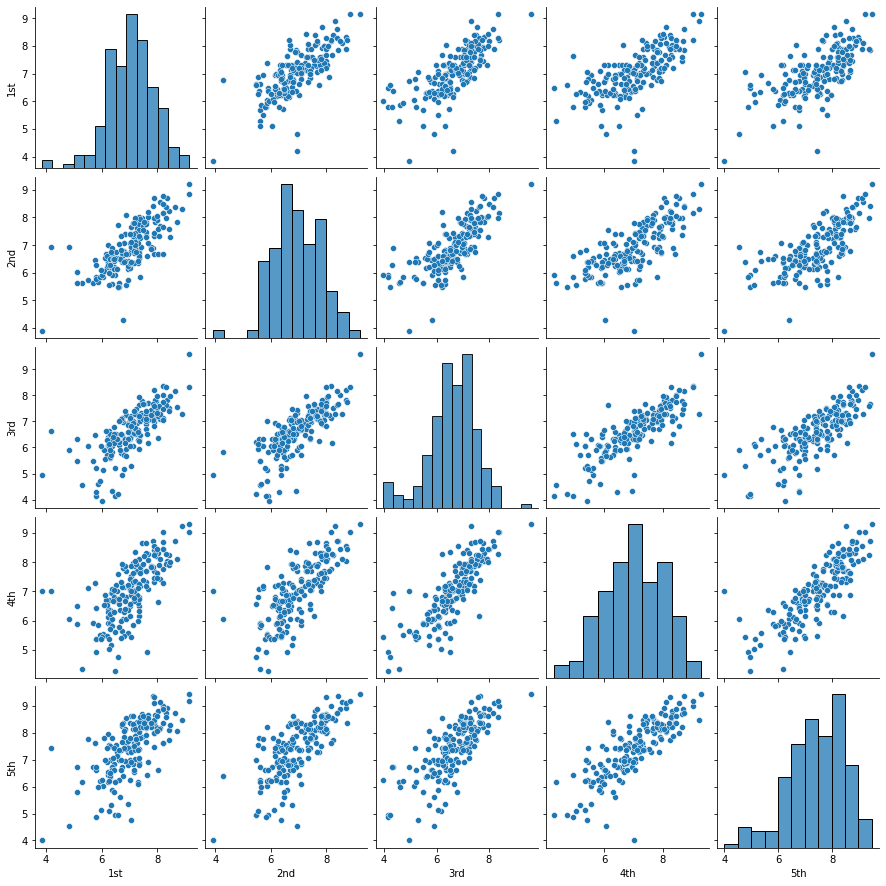

In [178]:
sns.pairplot(df)

In [197]:
df['Average']=(df['1st']+df['2nd']+df['3rd']+df['4th']+df['5th'])/5

In [198]:
df.head()

,1st,2nd,3rd,4th,5th,College Code,Gender,Student_Id,Average
0,8.11,7.68,7.11,7.43,8.18,115,Female,1151617020.0,7.702
1,6.48,5.90,4.15,4.29,4.96,115,Male,1151617021.0,5.156
2,8.41,8.24,7.52,8.25,7.75,115,Female,1151617022.0,8.034
3,7.33,6.83,6.33,6.79,6.89,115,Male,1151617023.0,6.834
4,7.89,7.34,7.22,7.32,7.46,115,Male,1151617024.0,7.446


## <b>Spliting the Data</b>

In [312]:
x = df[['1st','2nd','3rd','4th','5th']]
y = df['Average']

In [313]:
x.head()

,1st,2nd,3rd,4th,5th
0,8.11,7.68,7.11,7.43,8.18
1,6.48,5.90,4.15,4.29,4.96
2,8.41,8.24,7.52,8.25,7.75
3,7.33,6.83,6.33,6.79,6.89
4,7.89,7.34,7.22,7.32,7.46


In [314]:
y.head()

0    7.702
1    5.156
2    8.034
3    6.834
4    7.446
Name: Average, dtype: float64

## <b> Training the Data </b>

In [315]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

In [316]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y, test_size=0.25, random_state = 101)

## <b> Evaluation </b>

In [317]:
model = LinearRegression().fit(xtrain,ytrain)
round( (model.score(xtest,ytest)*100),2)

100.0

## <b> Deployment </b>

In [318]:
Result = model
pd.to_pickle(Result,'Result Prediction Model')

# <b> Creating GUI </b>

In [319]:
model = pd.read_pickle('Result Prediction Model')

In [320]:
model

LinearRegression()

In [321]:
cols = ['1st','2nd','3rd','4th','5th','Average']
import tkinter as tk

In [324]:
def predict():
    model = pd.read_pickle('Result Prediction Model')
    cols = ['1st','2nd','3rd','4th','5th']
    query = pd.DataFrame({'1st':[first.get()],'2nd':[second.get()],'3rd':[third.get()],'4th':[fourth.get()],'5th':[fifth.get()]})
    print('The Final CGPA is ',model.predict(query)[0])
                                                   



app = tk.Tk()
app.geometry('500x450')
app.title("Result Prediction System")
app.configure(background='#567')

## Creating Labels
 
tk.Label(app,text='Result Prediction Model',font=('georgia', 15 ,"bold"),bg='black',fg='red').place(x=10,y=10)
tk.Label(app, text='Enter The First Semester CGPA',font=('Georgia',10),fg= 'Black').place(x=50,y=50)
tk.Label(app, text='Enter The Second Semester CGPA',font=('Georgia',10),fg='black').place(x=50,y=100)
tk.Label(app, text='Enter The Third Semester CGPA',font=('Georgia',10),fg='black').place(x=50,y=150)
tk.Label(app, text='Enter The Fourth Semester CGPA',font=('Georgia',10),fg='black').place(x=50,y=200)
tk.Label(app, text='Enter The Fifth Semester CGPA',font=('Georgia',10),fg='black').place(x=50,y=250)



## Declaring Varables
first =tk.Variable(app)
tk.Entry(app,textvariable = first,width=30,fg='black').place(x=300,y=50)
second=tk.Variable(app)
tk.Entry(app,textvariable = second,width=30,fg='black').place(x=300,y=100)
third=tk.Variable(app)
tk.Entry(app,textvariable = third,width=30,fg='black').place(x=300,y=150)
fourth=tk.Variable(app)
tk.Entry(app,textvariable = fourth,width=30,fg='black').place(x=300,y=200)                                                 
fifth=tk.Variable(app)
tk.Entry(app,textvariable = fifth,width=30,fg='black').place(x=300,y=250) 


                                   
                                                   
## Creating Button
tk.Button(app,text='Predict Price',font='Algerian',bg='Black',width=15,fg='White', command=predict).place(x=150,y=300)


app.mainloop()